In [2]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

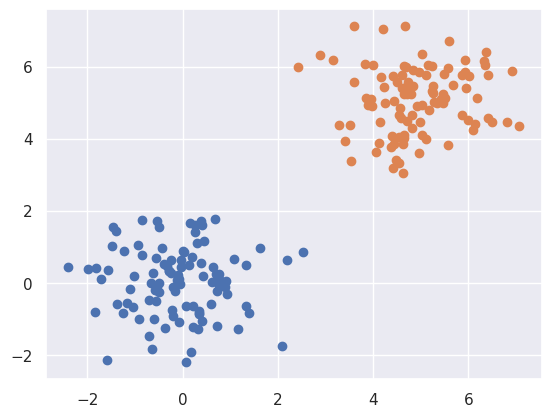

In [9]:
size = 100

data1 = np.random.multivariate_normal(mean=np.zeros(2), cov=np.eye(2), size=size)
data2 = np.random.multivariate_normal(mean=5*np.ones(2), cov=np.eye(2), size=size)

y1 = np.zeros(size)
y2 = np.ones(size)


plt.scatter(data1[:, 0], data1[:, 1])
plt.scatter(data2[:, 0], data2[:, 1])
plt.show()

In [14]:
np.r_[data1, data2].shape

np.r_[y1, y2].shape

(200,)

In [28]:
svm = SVC(C=1000,
          kernel='linear')

svm.fit(np.r_[data1, data2],
        np.r_[y1, y2],)


SVC(C=1000, kernel='linear')

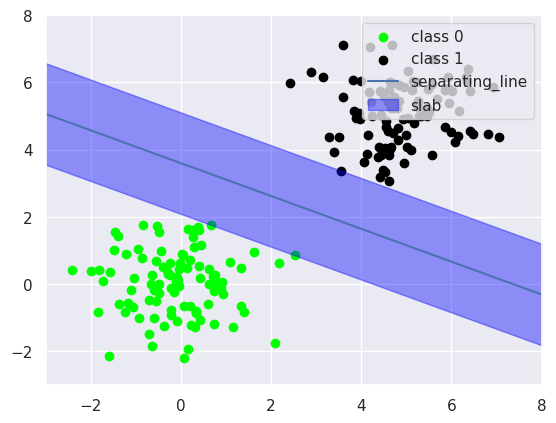

In [32]:
w = svm.coef_[0]
b = svm.intercept_[0]


fig, ax = plt.subplots()
ax.set_xlim(-3, 8)
ax.set_ylim(-3,8)
ax.scatter( data1[:, 0], data1[:, 1], label='class 0', color='lime')
ax.scatter( data2[:, 0], data2[:, 1], label='class 1', color='black')

x_coords = np.array([-3, 8])
y_coords = -(w[0]*x_coords+b)/w[1]
ax.plot( x_coords, y_coords, label = "separating_line" )
dist = 1/w[1]
ax.fill_between(x_coords, y_coords - dist, y_coords+dist, label = "slab", edgecolor = None, alpha=0.4, color='blue')

ax.legend(loc='upper right')
plt.show()

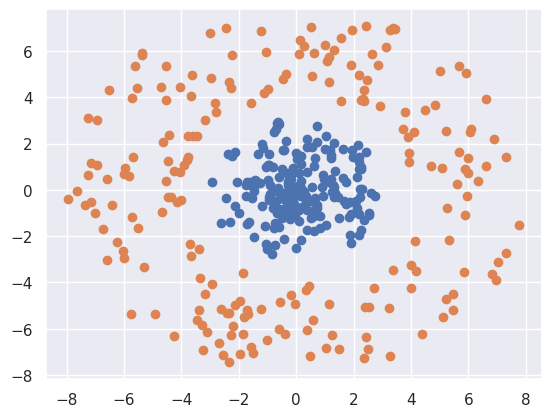

In [39]:
size = 200

# circular data
theta1 = 2 * np.pi * np.random.uniform(0, 1, size = size)
theta2 = 2 * np.pi * np.random.uniform(0, 1, size = size)

radius1 = np.random.uniform(0, 3, size = size)
radius2 = np.random.uniform(4, 8, size = size)

y1 = np.zeros(size)
y2 = np.ones(size)

data1 = (radius1*np.array([np.sin(theta1), np.cos(theta1)])).T
data2 = (radius2*np.array([np.sin(theta2), np.cos(theta2)])).T


plt.scatter(data1[:, 0], data1[:, 1])
plt.scatter(data2[:, 0], data2[:, 1])
plt.show()

In [40]:
svm = SVC(C=1000,
          kernel='linear')

svm.fit(np.r_[data1, data2],
        np.r_[y1, y2],)


SVC(C=1000, kernel='linear')

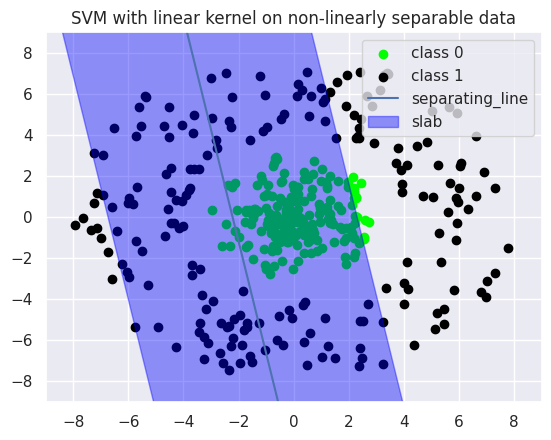

In [43]:
w = svm.coef_[0]
b = svm.intercept_[0]


fig, ax = plt.subplots()
ax.set_xlim(-9, 9)
ax.set_ylim(-9, 9)
ax.scatter( data1[:, 0], data1[:, 1], label='class 0', color='lime')
ax.scatter( data2[:, 0], data2[:, 1], label='class 1', color='black')

x_coords = np.array([-9, 9])
y_coords = -(w[0]*x_coords+b)/w[1]
ax.plot( x_coords, y_coords, label = "separating_line" )
dist = 1/w[1]
ax.fill_between(x_coords, y_coords - dist, y_coords+dist, label = "slab", edgecolor = None, alpha=0.4, color='blue')

ax.legend(loc='upper right')
plt.title('SVM with linear kernel on non-linearly separable data')
plt.show()

In [44]:
svm = SVC(C=1000,
          kernel='rbf')

svm.fit(np.r_[data1, data2],
        np.r_[y1, y2],)


SVC(C=1000)

In [46]:
xx, yy = np.meshgrid(np.linspace(-8, 8, 100),
                     np.linspace(-8, 8, 100))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


<bound method BaseSVC.decision_function of SVC(C=1000)>

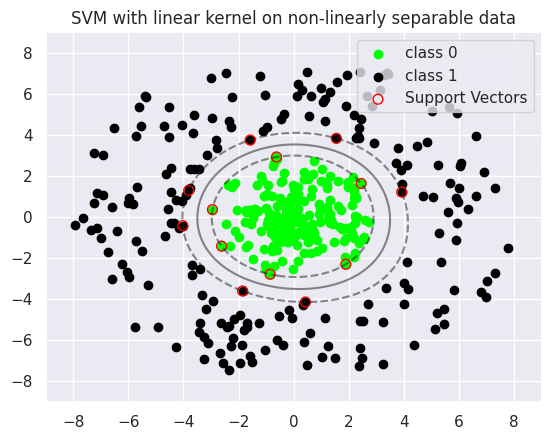

In [51]:


fig, ax = plt.subplots()
ax.set_xlim(-9, 9)
ax.set_ylim(-9, 9)
ax.scatter( data1[:, 0], data1[:, 1], label='class 0', color='lime')
ax.scatter( data2[:, 0], data2[:, 1], label='class 1', color='black')

xx, yy = np.meshgrid(np.linspace(-8, 8, 100),
                     np.linspace(-8, 8, 100))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=50, facecolors='none', edgecolors='red', label='Support Vectors')

ax.legend(loc='upper right')
plt.title('SVM with linear kernel on non-linearly separable data')
plt.show()

---

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.96      0.98      0.97        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.97      0.97      0.97        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [

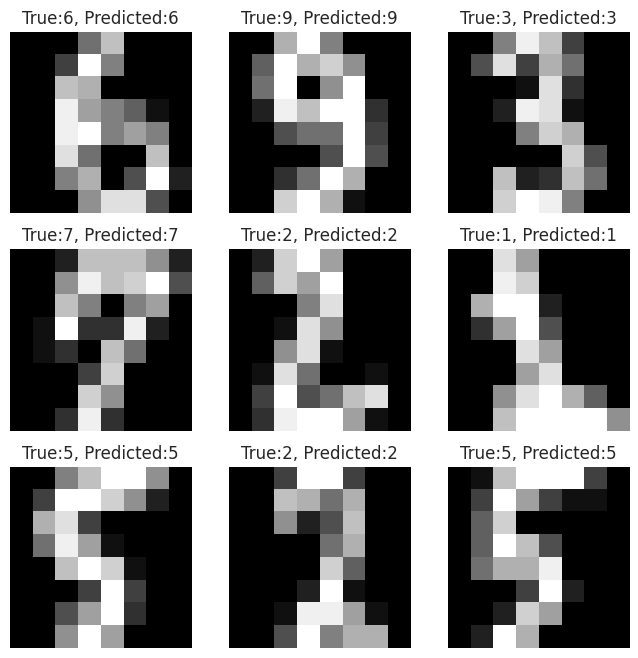

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# --- MODIFY ---
from sklearn.datasets import load_digits
# import methods for svm

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
np.random.seed(0)

# Load the digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# --- MODIFY ---
# Train the SVM classifier
svm_classifier = SVC(C=100) # add code

# fit SVM
svm_classifier.fit(X_train, y_train)

# Predict on the test data, X_test using svm_classifier
y_pred = svm_classifier.predict(X_test)

#####################################
# done
# check accuracy
# try with different kernels
####################################


# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualize some of the test results
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"True:{y_test[i]}, Predicted:{y_pred[i]}")
    ax.axis('off')
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.80      1.00      0.89         4

    accuracy                           0.93        14
   macro avg       0.90      0.95      0.92        14
weighted avg       0.94      0.93      0.93        14

Confusion Matrix:
[[9 1]
 [0 4]]


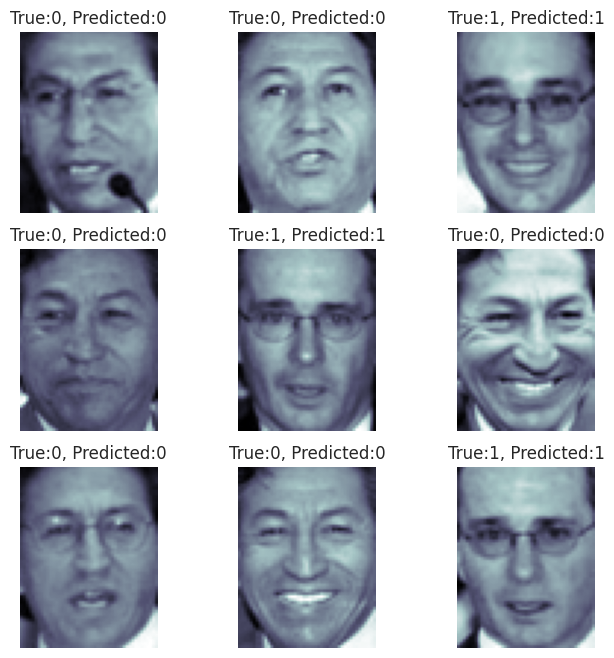

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# --- MODIFY ---
from sklearn.datasets import fetch_lfw_people

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Load the faces dataset
faces = fetch_lfw_people(min_faces_per_person=15) # load the images
X, y = faces.data, faces.target

# Select only two classes for binary classification
class_mask = np.isin(y, [0, 1])
X = X[class_mask]
y = y[class_mask]

# Balance the dataset through undersampling
class_0_indices = np.where(y == 0)[0]
class_1_indices = np.where(y == 1)[0]
num_samples = min(len(class_0_indices), len(class_1_indices))
balanced_indices = np.concatenate([class_0_indices[:num_samples], class_1_indices[:num_samples]])
X = X[balanced_indices]
y = y[balanced_indices]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the SVM classifier
svm_classifier = SVC(C=100) # add svm

# fit svm
svm_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = svm_classifier.predict(X_test)

#####################################
# done
# check accuracy
# try with different kernels
####################################

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualize some of the test results
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(faces.images.shape[1], faces.images.shape[2]), cmap='bone')
    ax.set_title(f"True:{y_test[i]}, Predicted:{y_pred[i]}")
    ax.axis('off')
plt.show()
